# 1. Spark数据分析导论
本章会从宏观角度介绍 Spark 到底是什么。

## 1.1 Spark是什么
Spark 是一个用来实现快速而通用的集群计算的平台。

在速度方面，Spark 扩展了广泛使用的 MapReduce 计算模型，而且高效地支持更多计算模式，包括交互式查询和流处理。Spark 的一个主要特点就是能够在内存中进行计算，因而更快。不过即使是必须在磁盘上进行的复杂计算，Spark 依然比 MapReduce 更加高效。

总的来说，Spark 适用于各种各样原先需要多种不同的分布式平台的场景，包括批处理、迭代算法、交互式查询、流处理。通过在一个统一的框架下支持这些不同的计算，Spark 使我们可以简单而低耗地把各种处理流程整合在一起。而这样的组合，在实际的数据分析过程中是很有意义的。不仅如此，Spark 的这种特性还大大减轻了原先需要对各种平台分别管理的负担。

## 1.2 一个大一统的软件栈
Spark 项目包含多个紧密集成的组件。

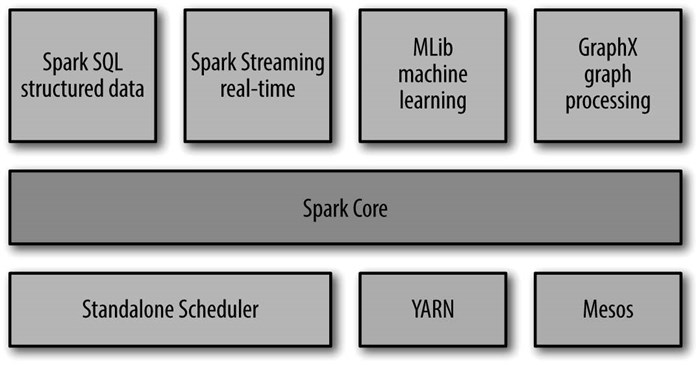

### 1.2.1 Spark Core
Spark Core 实现了 Spark 的基本功能，包含任务调度、内存管理、错误恢复、与存储系统交互等模块。Spark Core 中还包含了对弹性分布式数据集（resilient distributed dataset，简称 RDD）的 API 定义。RDD 表示分布在多个计算节点上可以并行操作的元素集合，是 Spark 主要的编程抽象。Spark Core 提供了创建和操作这些集合的多个 API。

### 1.2.2 Spark SQL
Spark SQL 是 Spark 用来操作结构化数据的程序包。通过 Spark SQL，我们可以使用 SQL 或者 Apache Hive 版本的 SQL 方言（HQL）来查询数据。Spark SQL 支持多种数据源，比如 Hive 表、Parquet 以及 JSON 等。除了为 Spark 提供了一个 SQL 接口，Spark SQL 还支持开发者将 SQL 和传统的 RDD 编程的数据操作方式相结合，不论是使用 Python、Java 还是 Scala，开发者都可以在单个的应用中同时使用 SQL 和复杂的数据分析。通过与 Spark 所提供的丰富的计算环境进行如此紧密的结合，Spark SQL 得以从其他开源数据仓库工具中脱颖而出。Spark SQL 是在 Spark 1.0 中被引入的。

在 Spark SQL 之前，加州大学伯克利分校曾经尝试修改 Apache Hive 以使其运行在 Spark 上，当时的项目叫作 Shark。现在，由于 Spark SQL 与 Spark 引擎和 API 的结合更紧密，Shark 已经被 Spark SQL 所取代。

### 1.2.3 Spark Streaming
Spark Streaming 是 Spark 提供的对实时数据进行流式计算的组件。比如生产环境中的网页服务器日志，或是网络服务中用户提交的状态更新组成的消息队列，都是数据流。Spark Streaming 提供了用来操作数据流的 API，并且与 Spark Core 中的 RDD API 高度对应。这样一来，程序员编写应用时的学习门槛就得以降低，不论是操作内存或硬盘中的数据，还是操作实时数据流，程序员都更能应对自如。从底层设计来看，Spark Streaming 支持与 Spark Core 同级别的容错性、吞吐量以及可伸缩性。

### 1.2.4 MLlib
MLlib 提供了很多种机器学习算法，包括分类、回归、聚类、协同过滤等，还提供了模型评估、数据导入等额外的支持功能。MLlib 还提供了一些更底层的机器学习原语，包括一个通用的梯度下降优化算法。所有这些方法都被设计为可以在集群上轻松伸缩的架构。

### 1.2.5 GraphX
GraphX 是用来操作图（比如社交网络的朋友关系图）的程序库，可以进行并行的图计算。与 Spark Streaming 和 Spark SQL 类似，GraphX 也扩展了 Spark 的 RDD API，能用来创建一个顶点和边都包含任意属性的有向图。GraphX 还支持针对图的各种操作（比如进行图分割的 subgraph 和操作所有顶点的 mapVertices），以及一些常用图算法（比如 PageRank 和三角计数）。

### 1.2.6 集群管理器
就底层而言，Spark 设计为可以高效地在一个计算节点到数千个计算节点之间伸缩计算。为了实现这样的要求，同时获得最大灵活性，Spark 支持在各种集群管理器（cluster manager）上运行，包括 Hadoop YARN、Apache Mesos，以及 Spark 自带的一个简易调度器，叫作独立调度器。如果要在没有预装任何集群管理器的机器上安装 Spark，那么 Spark 自带的独立调度器可以让你轻松入门；而如果已经有了一个装有 Hadoop YARN 或 Mesos 的集群，通过 Spark 对这些集群管理器的支持，你的应用也同样能运行在这些集群上。

